In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [66]:
df=pd.read_csv('income.csv')

In [67]:
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [68]:
from sklearn.cluster import KMeans
km= KMeans(n_clusters=3)

In [69]:
cl=km.fit_predict(df[['Age','Income($)']])

In [70]:
df['cluster']=cl

In [71]:
df

,Name,Age,Income($),cluster
0,Rob,27,70000,1
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0
5,Gautam,39,155000,0
6,David,41,160000,0
7,Andrea,38,162000,0
8,Brad,36,156000,0
9,Angelina,35,130000,0


In [72]:
r1=df[df.cluster==0]
r2=df[df.cluster==1]
r3=df[df.cluster==2]

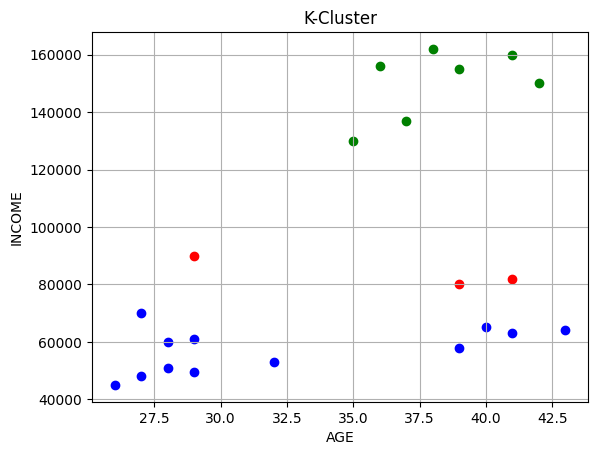

In [73]:
plt.title('K-Cluster')
plt.scatter(r1.Age,r1['Income($)'],color='green')
plt.scatter(r2.Age,r2['Income($)'],color='blue')
plt.scatter(r3.Age,r3['Income($)'],color='red')
plt.grid(True)
plt.xlabel('AGE')
plt.ylabel('INCOME')
plt.show()

In [74]:
from sklearn.preprocessing import MinMaxScaler
mn= MinMaxScaler()
mn.fit(df[['Income($)']])
df['Income_n']=mn.transform(df[['Income($)']])

In [75]:
mn.fit(df[['Age']])
df['Age_n']=mn.transform(df[['Age']])

In [76]:
df=df.drop(['Age','Income($)','cluster'],axis='columns')


In [77]:
c=km.fit_predict(df[['Age_n','Income_n']])

In [78]:
df['clusters']=c

In [84]:
df
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

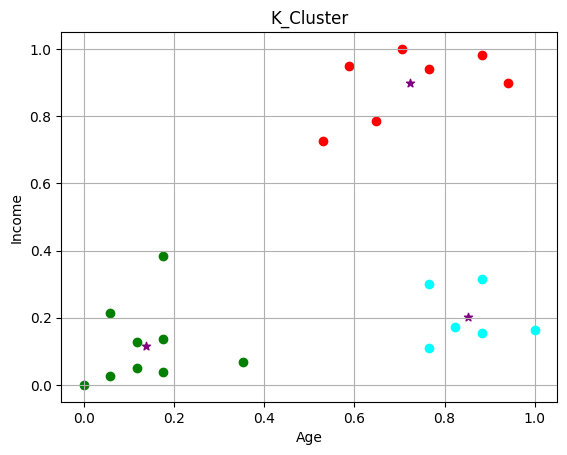

In [91]:
d1=df[df.clusters==0]
d2=df[df.clusters==1]
d3=df[df.clusters==2]
plt.title('K_Cluster')
plt.scatter(d1.Age_n,d1.Income_n,color='green')
plt.scatter(d2.Age_n,d2.Income_n,color='red')
plt.scatter(d3.Age_n,d3.Income_n,color='cyan')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*')
plt.xlabel('Age')
plt.ylabel('Income')
plt.grid(True)

In [95]:
#for elbow technique
sse=[]
for k in range(1,11):
    km= KMeans(n_clusters=k)
    km.fit(df[['Age_n','Income_n']])
    sse.append(km.inertia_)
    

In [96]:
sse

[5.434011511988178,
 2.091136388699078,
 0.4750783498553096,
 0.368773407644059,
 0.34065929451826416,
 0.2582506560719453,
 0.17851804234260693,
 0.1471853679399594,
 0.1038375258660356,
 0.09504207214592275]

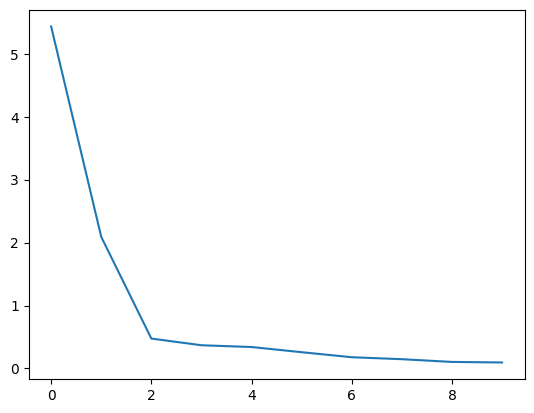

In [98]:
x=[1,2,3,4,]
plt.plot(sse)